In [1]:
#! CA_CURL_BUNDLE=/ca-certificates.crt pip install polars scikit-learn

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("data/weight_dataset.csv")

In [61]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoLarsCV, LassoLars
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer

import matplotlib.pyplot as plt

In [8]:
df.columns

Index(['pid', 'TRNSCRPT;ADRNL;ENSRNOG00000000008',
       'TRNSCRPT;SKM-VL;ENSRNOG00000000012',
       'TRNSCRPT;ADRNL;ENSRNOG00000000012',
       'TRNSCRPT;BLOOD;ENSRNOG00000000033',
       'TRNSCRPT;SPLEEN;ENSRNOG00000000034',
       'TRNSCRPT;COLON;ENSRNOG00000000034',
       'TRNSCRPT;OVARY;ENSRNOG00000000036',
       'TRNSCRPT;ADRNL;ENSRNOG00000000036',
       'TRNSCRPT;COLON;ENSRNOG00000000036',
       ...
       'TRNSCRPT;WAT-SC;ENSRNOG00000062276',
       'ATAC;LIVER;chr15:93634588-93635092',
       'TRNSCRPT;HEART;ENSRNOG00000062298',
       'TRNSCRPT;HIPPOC;ENSRNOG00000062298',
       'TRNSCRPT;KIDNEY;ENSRNOG00000062298',
       'TRNSCRPT;BLOOD;ENSRNOG00000062298',
       'TRNSCRPT;CORTEX;ENSRNOG00000062298',
       'TRNSCRPT;ADRNL;ENSRNOG00000062306', 'norm_mass_lost', 'group'],
      dtype='object', length=22683)

In [9]:
X = df.drop('norm_mass_lost', axis=1).drop('group', axis=1)
y = df['norm_mass_lost']
stratify = df['group']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=stratify)

In [13]:
X_train.shape

(56, 22681)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
X_train_scaled_imputed = np.nan_to_num(X_train_scaled, nan=0)
X_test_scaled_imputed = np.nan_to_num(X_test_scaled, nan=0)

In [56]:


# Initialize the KNNImputer with desired parameters
imputer = KNNImputer(n_neighbors=3, weights='uniform')

# Fit the imputer and transform the dataset
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)
X_test_scaled_imputed = imputer.fit_transform(X_test_scaled)


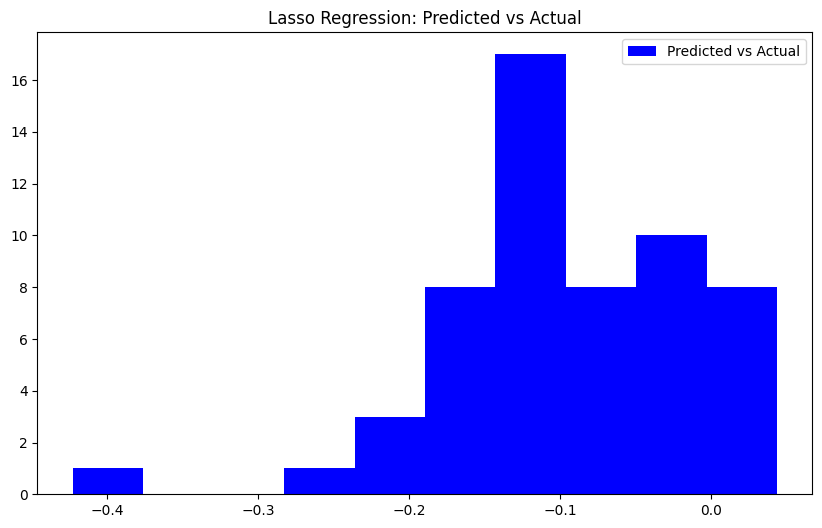

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(y_train, color='blue', label='Dist of Training Y')
plt.title('Lasso Regression: Predicted vs Actual')
plt.legend()
plt.show()

In [73]:
def mse_for_alpha(alpha):
    lasso = LassoLars(alpha=alpha)
    lasso.fit(X_train_scaled_imputed, y_train)
    y_pred = lasso.predict(X_test_scaled_imputed)
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [75]:
alphas = [0.001*i+0.001 for i in range(56)]
mses = [mse_for_alpha(alpha) for alpha in alphas]
[x for x in zip(alphas,mses)]

[(0.001, 0.010455785018378079),
 (0.002, 0.0081248027536192),
 (0.003, 0.006092897563911512),
 (0.004, 0.00529487417960075),
 (0.005, 0.004682802091775965),
 (0.006, 0.0036112112833020116),
 (0.007, 0.0029441710605809554),
 (0.008, 0.002594125623973433),
 (0.009000000000000001, 0.0023638225939258905),
 (0.010000000000000002, 0.002381824281769288),
 (0.011, 0.0025826160167170885),
 (0.012, 0.002678772736685346),
 (0.013000000000000001, 0.0026328919442145365),
 (0.014000000000000002, 0.0025841134404010987),
 (0.015, 0.002540375797811816),
 (0.016, 0.0024879251949553294),
 (0.017, 0.0024645985928563896),
 (0.018000000000000002, 0.002448755353630779),
 (0.019000000000000003, 0.0024283932348911088),
 (0.02, 0.0024089617842290457),
 (0.021, 0.002394537642252087),
 (0.022000000000000002, 0.0023929475602866893),
 (0.023, 0.0023813925516819974),
 (0.024, 0.002378833292460622),
 (0.025, 0.002397340877363069),
 (0.026000000000000002, 0.0024230875655596286),
 (0.027000000000000003, 0.0024553629833

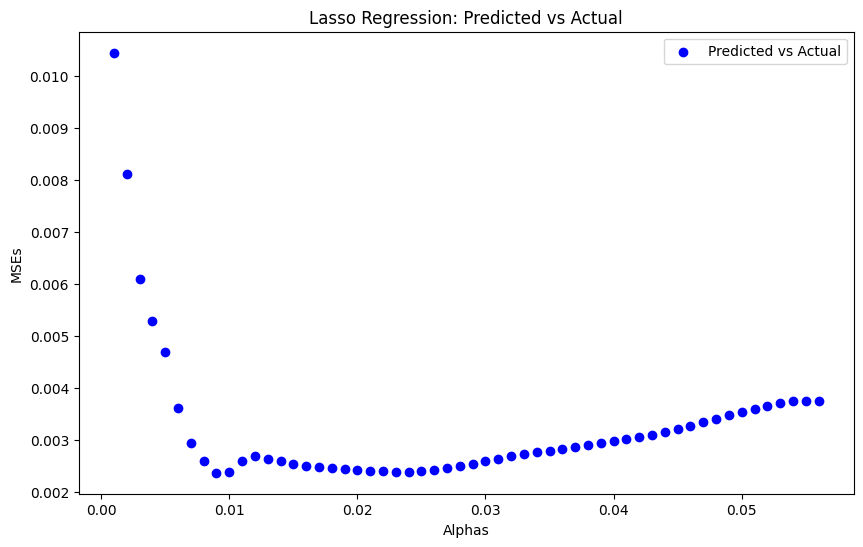

In [76]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(alphas, mses, color='blue', label='Predicted vs Actual')
plt.xlabel('Alphas')
plt.ylabel('MSEs')
plt.title('Lasso Regression: Predicted vs Actual')
plt.legend()
plt.show()


In [45]:
alphas = [0.25*i for i in range(10)]
mses = [mse_for_alpha(alpha) for alpha in alphas]

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.598e-02, tolerance: 4.162e-05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

In [81]:
lasso = LassoLars(alpha=0.025)  # You can adjust the alpha parameter
lasso.fit(X_train_scaled_imputed, y_train)

LassoLars(alpha=0.025)

In [82]:
y_pred = lasso.predict(X_test_scaled_imputed)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.002397340877363069


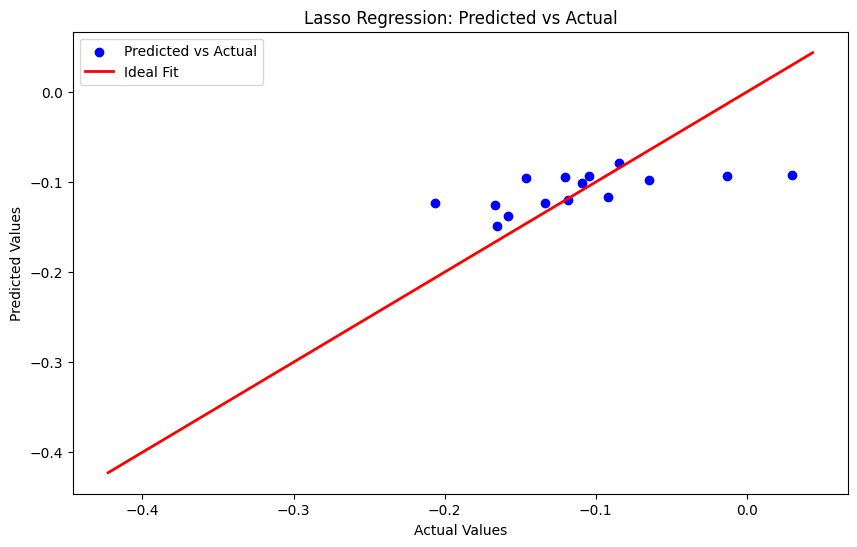

In [84]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression: Predicted vs Actual')
plt.legend()
plt.show()

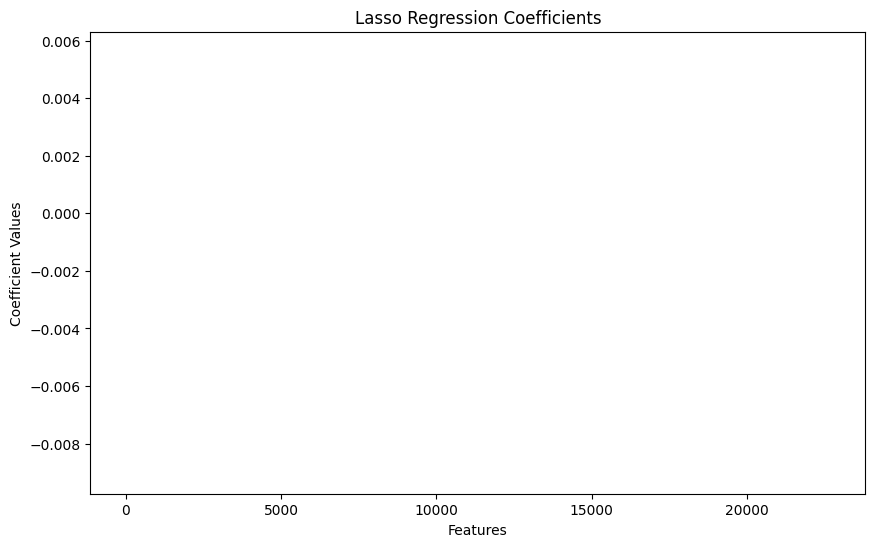

In [85]:
# Visualize the coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(len(lasso.coef_)), lasso.coef_)
plt.xlabel('Features')
plt.ylabel('Coefficient Values')
plt.title('Lasso Regression Coefficients')
plt.show()

In [88]:
# Visualize the coefficients
df = pd.Series(lasso.coef_)
df[df > 0].shape

(5,)